# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Fadhlan Nazhif Azizy
- **Email:** fadhlannazhif5@gmail.com
- **ID Dicoding:** fadhlan_nazhif_azizy_KOlf

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan kondisi lingkungan (weathershit,temp,atemp,hum,windspeed) ketika jumlah rental sepeda harian tertinggi dan terendah selama tahun 2012?
- Bagaimana kecenderungan kecenderungan jumlah rental berdasarkan kondisi lingkungan (weathesit) pada tahun 2011?

## Import Semua Packages/Library yang Digunakan

Import semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

Import data dan menampilkan 5 row pertama

In [ ]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menemukan apakah terdapat dta yang kosong atau duplikasi

In [ ]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print(day_df.duplicated().sum())

0


In [ ]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print(hour_df.duplicated().sum())

0


Menentukan data yang outlier

In [ ]:
day_percentile_1 = day_df.quantile(0.25,numeric_only=True)
day_percentile_3 = day_df.quantile(0.75, numeric_only=True)
day_iqr = day_percentile_3-day_percentile_1

iqr_kons = 1.5

def is_numerical(column):
    return pd.api.types.is_numeric_dtype(column)

# Count numerical columns
day_numerical_columns = [column for column in day_df.columns if is_numerical(day_df[column])]

print(type(day_percentile_1))
day_count_values = {}
day_upper_bound = {}
day_lower_bound = {}
for column in day_numerical_columns:
    # Define the upper bound for outliers
    day_upper_bound[column] = day_percentile_3[column] + iqr_kons * day_iqr[column]

    day_lower_bound[column] = day_percentile_1[column] - iqr_kons * day_iqr[column]
    # Count occurrences of specific values in each column satisfying the condition
    day_count_values[column] = day_df[column][(day_df[column] > day_upper_bound[column]) | (day_df[column] < day_lower_bound[column])]

print((type(day_count_values['windspeed'])))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
hour_percentile_1 = hour_df.quantile(0.25,numeric_only=True)
hour_percentile_3 = hour_df.quantile(0.75, numeric_only=True)
hour_iqr = hour_percentile_3-hour_percentile_1

iqr_kons = 1.5

def is_numerical(column):
    return pd.api.types.is_numeric_dtype(column)

hour_upper_bound = {}
hour_lower_bound = {}

# Count numerical columns
hour_numerical_columns = [column for column in hour_df.columns if is_numerical(hour_df[column])]

print(type(hour_percentile_1))
hour_count_values = {}
for column in hour_numerical_columns:
    # Define the upper bound for outliers
    hour_upper_bound[column] = hour_percentile_3[column] + iqr_kons * hour_iqr[column]

    hour_lower_bound[column] = hour_percentile_1[column] - iqr_kons * hour_iqr[column]
    # Count occurrences of specific values in each column satisfying the condition
    hour_count_values[column] = hour_df[column][(hour_df[column] > hour_upper_bound[column]) | (hour_df[column] < hour_lower_bound[column])].count()

pd.Series(hour_count_values)
print(hour_count_values)

<class 'pandas.core.series.Series'>
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


### Cleaning Data

Imputation pada data outlier dengan upperbound ataupun lowebound

In [ ]:
#Cleaning data with outlier imputation
for column in day_numerical_columns:
    #imputation the outlier with the outer bound
    day_df[column].loc[day_df[column]>day_upper_bound[column]] = day_upper_bound[column]


C:\Users\fadhl\AppData\Local\Temp\ipykernel_7756\1026915317.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  day_df[column].loc[day_df[column]>day_upper_bound[column]] = day_upper_bound[column]
C:\Users\fadhl\AppData\Local\Temp\ipykernel_

In [ ]:
#Cleaning data with outlier imputation
for column in hour_numerical_columns:
    #imputation the outlier with the outer bound
    hour_df[column].loc[hour_df[column]>hour_upper_bound[column]] = hour_upper_bound[column]

print(hour_lower_bound['windspeed'])
print(hour_df['windspeed'].sort_values())



-0.1193
0        0.0000
11542    0.0000
3294     0.0000
11514    0.0000
11513    0.0000
          ...  
5444     0.4775
8069     0.4775
3570     0.4775
15874    0.4775
9052     0.4775
Name: windspeed, Length: 17379, dtype: float64


C:\Users\fadhl\AppData\Local\Temp\ipykernel_7756\1258181211.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  hour_df[column].loc[hour_df[column]>hour_upper_bound[column]] = hour_upper_bound[column]
C:\Users\fadhl\AppData\Local\Temp\ipyker

## Exploratory Data Analysis (EDA)

### Explore ...

Mendapatkan statistik umum dari tiap kolom yang tersedia pada data

In [ ]:
(day_df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.0,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.189846,824.388509,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.0,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.075644,623.642956,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.0,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.0,3.003683,0.682721,1.425197,0.496987,0.475775,0.627229,0.188691,31.158812,148.645204,186.361327
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.0,2.005771,0.465431,0.639043,0.192556,0.171850,0.192930,0.118197,34.813147,135.351791,171.931168
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.0,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.0,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.500000,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
day_df_2012 = day_df.loc[day_df['yr']==1].loc[:,['temp','atemp','hum','windspeed','cnt']]

x_bar = [column for column in day_df_2012.columns if is_numerical(day_df_2012[column])]

max_cnt = day_df_2012['cnt'].max()
min_cnt = day_df_2012['cnt'].min()
print(x_bar)

plot_data = pd.DataFrame(pd.concat([day_df_2012.loc[(day_df['cnt']==max_cnt)],day_df_2012.loc[(day_df['cnt']==min_cnt)]]))

plot_data_stat = pd.DataFrame(pd.concat([pd.DataFrame(day_df_2012.max()).transpose(),pd.DataFrame(day_df_2012.min()).transpose()]))

plot_data.insert(0,'index', ['max_day','min_day'],True)
plot_data_stat.insert(0,'index', ['max_stat','min_stat'],True)
# min_cond = day_df_2012.loc[day_df['cnt']==min_cnt]

# # print(type(max_cond))
plot_data.set_index('index',inplace=True)
plot_data_stat.set_index('index',inplace=True)

plotted_data = pd.DataFrame(pd.concat([plot_data,plot_data_stat])).loc[:,'temp':'windspeed']

plotted_data.to_csv('./dashboard/answer_1.csv', header=True, index=True)
# barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8)) 

# plot_data.plot(colorbar={'red', 'blue'})

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


<Axes: xlabel='day', ylabel='temp (C)'>

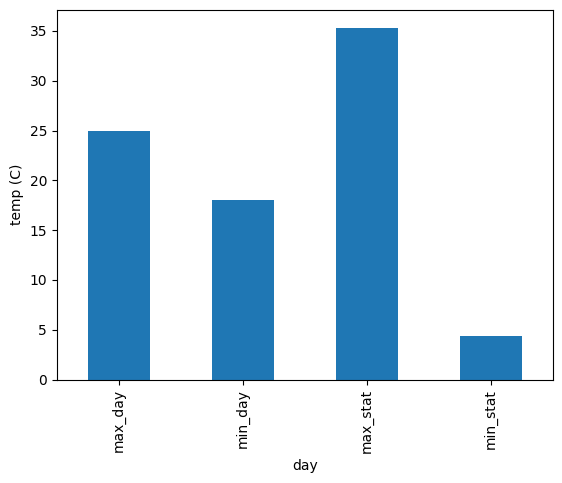

In [ ]:
(plotted_data['temp']*41).plot(kind='bar', ylabel='temp (C)', xlabel='day')


<Axes: xlabel='day', ylabel='atemp (C)'>

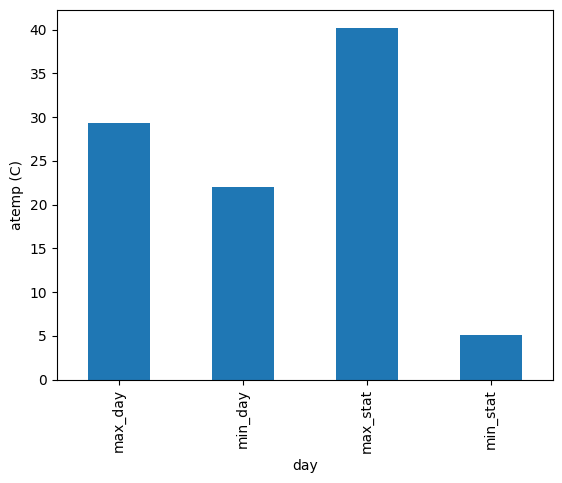

In [ ]:
(plotted_data['atemp']*50).plot(kind='bar', ylabel='atemp (C)', xlabel='day')

<Axes: xlabel='day', ylabel='humidity'>

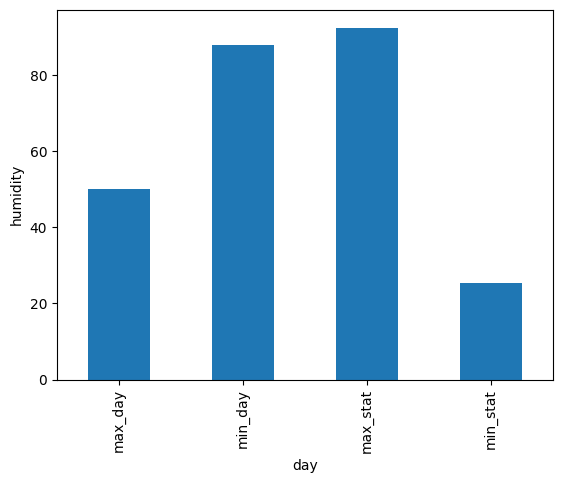

In [ ]:
(plotted_data['hum']*100).plot(kind='bar', ylabel='humidity', xlabel='day')

<Axes: xlabel='day', ylabel='windspeed (m/s)'>

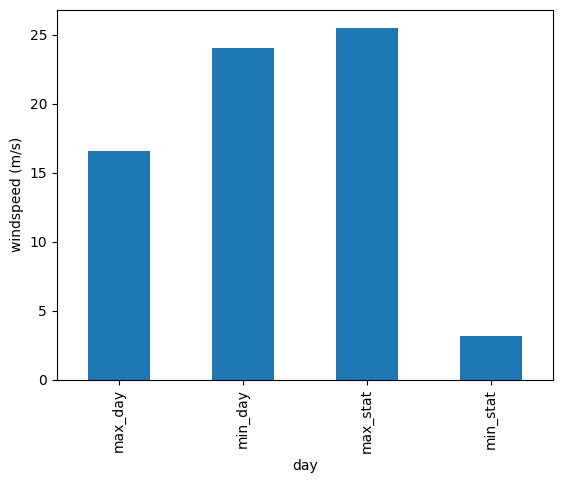

In [ ]:
(plotted_data['windspeed']*67).plot(kind='bar', ylabel = 'windspeed (m/s)', xlabel='day')

Dari grafik-grafik di atas, dapat diketahui jumlah perental sepeda terbanyak dan tersedikit terjadi ketika suhu udara tidak terlalu panas dan tidak terlalu dingin yakni terbanyak ketika suhu udara 25 derajat celcius dan tersedikit ketika suhu udara 18 derajat celcius,

Berdasarkan kelembapan udara, perental terbanyak terjadi ketika kelembapan udara cenderung sedang dan tersdikit terjadi ketika kelembapan udara cenderung tinggi

Berdasarkan kecepatan angin, perental terbanyak terjadi ketika kecepatan angin cenderung sedang dan tersedikit terjadi ketika kecepatan angin cenderung tinggi

### Pertanyaan 2:

<Axes: title={'center': 'rate of rented bike based on weathersit in 2011'}, xlabel='weather'>

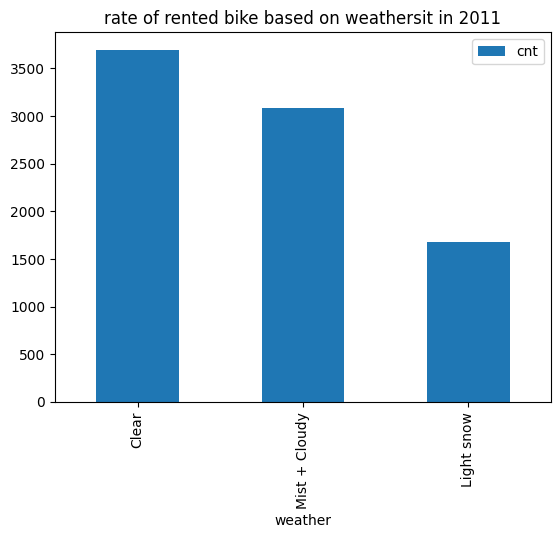

In [ ]:
day_df_env = (day_df.loc[(day_df['yr']==0)].loc[:,['weathersit','cnt']])
day_df_env_modified = day_df_env
# Assuming 'float_column' is the name of your float column
day_df_env_grouped = day_df_env_modified.groupby('weathersit').mean()
day_df_env_grouped.insert(0,'weather', ['Clear','Mist + Cloudy','Light snow'],True)
day_df_env_grouped.reset_index()
# print((day_df_env_grouped))
day_df_env_grouped.to_csv('./dashboard/answer_2.csv', header=True, index=True)
day_df_env_grouped.plot(kind='bar', title='rate of rented bike based on weathersit in 2011', x='weather')

Dari grafik di atas dapat diketahui rata-rata jumlah perental sepeda untuk setiap kategori weathersit

## Conclusion

- Conclution pertanyaan 1 : 
    Jumlah perental akan banyak apabila suhu udara cenderung hangat, kelembapan udara sedang dan kecepatan angin sedang. Serta jumlah perental akan sedikit apabila suhu udara cenderung sejuk, kelembapan udara tinggi, dan kecepatan angin tinggi.
- Conclution pertanyaan 2 : 
    Kumlah perental akan cenderung tinggi ketika kondisi lingkungan memenuhi kategori weathersit 1, yaitu Clear, Few clouds, Partly cloudy, Partly cloudy. Jumlah perental akan sedang ketika memnuhi kategori weathersit 2 yaitu Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. Dan jumlah perental akan cenderung rendah ketika kondisi lingkungan memenuhi kategori 3 yaitu Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds